## Final Project Submission


* Student name: Rachael Nduta Ngari
* Student pace: full time
* Scheduled project review date/time: 3/28/2025
* Instructor name: Diana Mongina



## **Problem Statement**  

The transportation industry, specifically the aviation industry, is not like most industries. Mistakes or accidents in aviation can result in **loss of life, property damage, severe injuries, and financial setbacks**. We must keep analyzing aviation data and making improvements because, despite advancements in technology and safety regulations, accidents still occur due to factors such as **pilot error, mechanical failures, and adverse weather conditions**. Additionally, some **regions, airlines, and regulatory environments** still have higher accident rates, raising concerns about the **effectiveness of existing safety measures**.  

This project aims to **analyze historical aviation accident data** to identify **contributing factors, high-risk locations, and trends in accident frequency**, providing insights into potential **safety improvements**.  


## **Overview**  

The project **explores and analyzes an aviation dataset** to identify **key contributing factors for accidents, emerging trends, and high-risk locations**. By applying **statistical and data visualization techniques**, the project provides **stakeholders (such as airlines and regulatory bodies) with valuable insights** to **reduce accidents and improve protocols**.  


## **Objectives**  

- **Identify factors contributing to accidents** (*weather, mechanical failures, pilot errors*)  
- **Identify high-risk locations** and **compare accident rates across countries** to assess the **regulatory effectiveness** of different regions  
- **Check trends in accident frequency and fatalities over time** and analyze their **correlation with regulations**


## **Solutions**  

## **1. Exploratory Data Analysis (EDA) and Data Cleaning** 
Exploring essential variables and data structures, and standardize formats, address missing values and ensure data consistency.
## **2. Data Visualizations**  
- **Bar graphs** to analyze accident distributions by:  
  - Aircraft type  
  - Weather conditions  
  - Number of engines  
  - Broad phase of flight  
- **Bar graphs** to identify **high-risk accident zones globally**.  
- **Line graphs** to analyze **accident and fatality rates over time**.  

## **3. Conclusion**  
- Summarize findings on:  
  - **Accident trends**  
  - **High-risk areas**  
  - **Contributing factors** actors**  




## 1. Exploratory data Analysis (EDA) and Data cleaning

The cell below imports all necessary libraries and loads the `Aviation Data` dataset as `df`.

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

%matplotlib inline  
df = pd.read_csv('Aviation_Data.csv', low_memory=False) 

**Getting the Gist of Our Data**


Before diving into analysis, let's first get the **gist** of our datas
t. We'll explore its struct, its data types, number of coloumns and rows, and the names of the columns.ure

In [2]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [3]:
df.shape  

(90348, 31)

There are **31 valuables** being investigated and **90,348 accidents**, this is without removing duplicates.


In [4]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [5]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


Here, we can see the **average**, **minimum**, **maximum**, and **total** number of people who **died**, were **seriously injured**, **uninjured**, and had **minor injuries**, as well as the **total number of engines**.


In [6]:
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

## **Data Cleaning**


Structuring, Detecting, and correcting errors, inconsistencies, and inaccuracies in a dataset to improve its quality and reliability.  


### **A. Remove Duplicates, Set `Event.ID` as the Index, and Drop Null Values for `Accident.Number` and `Event.ID`**  

- **I started by dropping duplicates in general and then duplicated `Accident.Number` and `Event.ID`**.  
- **The reason was that the same event and accident can't happen twice**.  
- **For `Accident.Number`, duplicates are two analysis done on the same accident but with diffent findings(here the first analysis is left and secon one treated as a duplicate), but for `Event.ID`, in most cases, the second record is a continution of the first record of the accident (e.g., `NYC08LA062A` and `NYC08LA062B`). the First record will be treated as the original.**


In [7]:
df.duplicated().sum() # checking for duplicated rows in the dataset

1390

In [8]:
df.drop_duplicates(inplace=True) #dropping the duplicated rows

In [9]:
df.shape #checking how many rows am left with

(88958, 31)

In [10]:
#checking for duplicates in the accident number coloum, as you can see its the same accident number, same event. The only difference is there is a miss match of information. The first occurance of the will be used and second deleted 
df[df.duplicated(subset=['Accident.Number'], keep=False)]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
64030,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69843,NaN,14-06-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74420,NaN,03-11-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74946,NaN,24-02-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75894,NaN,02-02-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90255,20221121106336,Accident,WPR23LA041,2022-11-18,"Las Vegas, NV",United States,361239N,1151140W,VGT,NORTH LAS VEGAS,...,Instructional,702 HELICOPTER INC,0.0,0.0,0.0,3.0,VMC,NaN,NaN,07-12-2022
90256,20221122106340,Incident,DCA23WA071,2022-11-18,"Marrakech,",Morocco,NaN,NaN,NaN,NaN,...,NaN,British Airways,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90257,20221122106340,Incident,DCA23WA071,2022-11-18,"Marrakech,",Morocco,NaN,NaN,NaN,NaN,...,NaN,Valair Private Jets,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90272,20221123106354,Accident,WPR23LA045,2022-11-22,"San Diego, CA",United States,323414N,1165825W,SDM,Brown Field Municipal Airport,...,Instructional,HeliStream Inc.,0.0,0.0,0.0,4.0,VMC,NaN,NaN,22-12-2022


In [11]:
df = df.drop_duplicates(subset=['Accident.Number'])# the second records of the accident numbers are dropped

In [12]:
df[df.duplicated(subset=['Event.Id'], keep=False)]# for the event rom this table you can see the second event is a continuation of the first event's records


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
117,20020917X01908,Accident,DCA82AA012B,1982-01-19,"ROCKPORT, TX",United States,NaN,NaN,RKP,ARANSAS COUNTY AIRPORT,...,Personal,NaN,3.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,19-01-1983
118,20020917X01908,Accident,DCA82AA012A,1982-01-19,"ROCKPORT, TX",United States,NaN,NaN,RKP,ARANSAS COUNTY AIRPORT,...,Executive/corporate,NaN,3.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,19-01-1983
153,20020917X02259,Accident,LAX82FA049A,1982-01-23,"VICTORVILLE, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,4.0,0.0,VMC,Unknown,Probable Cause,23-01-1983
158,20020917X02400,Accident,MIA82FA038B,1982-01-23,"NEWPORT RICHEY, FL",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Cruise,Probable Cause,23-01-1983
159,20020917X02400,Accident,MIA82FA038A,1982-01-23,"NEWPORT RICHEY, FL",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Approach,Probable Cause,23-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63823,20071227X02001,Accident,NYC08FA054A,2007-12-08,"Parkland, FL",United States,26.347222,-80.315278,NaN,NaN,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,Cruise,Probable Cause,10-09-2015
63841,20080213X00187,Accident,NYC08LA062B,2007-12-14,"NEW YORK, NY",United States,40.658333,-73.786666,JFK,John F. Kennedy International,...,Positioning,NaN,NaN,NaN,NaN,5.0,IMC,Standing,Probable Cause,30-09-2009
63842,20080213X00187,Accident,NYC08LA062A,2007-12-14,"NEW YORK, NY",United States,40.658333,-73.786666,JFK,John F. Kennedy International,...,Positioning,Air China Airlines,NaN,NaN,NaN,5.0,IMC,Taxi,Probable Cause,30-09-2009
63897,20080128X00107,Incident,OPS08IA004B,2007-12-27,"Teterboro, NJ",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,VMC,Taxi,Probable Cause,31-03-2008


In [14]:
df = df.drop_duplicates(subset=['Event.Id']) #here we drop the second record

In [13]:
df.shape # Now we check the number of rows that are remaining

(88864, 31)

In [15]:
df['Accident.Number'].isna().sum()#Now we drop the null values in the accident number, its just one

1

In [16]:
df = df.dropna(subset=["Accident.Number"])

In [17]:
df['Event.Id'].isna().sum() # checking for null values in event ID, and there is none.

0

In [18]:
df=df.set_index('Event.Id') # Now we set the event ID as the index

In [19]:
df.shape # checking if the number of rows remaining

(87951, 30)

### **B. Removing Columns with a High Percentage of Null Values**  

- **Because we can't fill in the missing values, any column with more than 20% missing values will be deleted** since they **cannot be used**.  


In [22]:
df.isna().sum() # checking the missing values in the dataset, Schedule and air carrier seem to have a significantly high number of missing values

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     222
Latitude                  53739
Longitude                 53748
Airport.Code              38467
Airport.Name              35920
Injury.Severity             990
Aircraft.damage            3103
Aircraft.Category         55770
Registration.Number        1350
Make                         63
Model                        92
Amateur.Built               100
Number.of.Engines          6027
Engine.Type                7043
FAR.Description           56036
Schedule                  75591
Purpose.of.flight          6122
Air.carrier               71418
Total.Fatal.Injuries      11267
Total.Serious.Injuries    12322
Total.Minor.Injuries      11760
Total.Uninjured            5863
Weather.Condition          4473
Broad.phase.of.flight     27114
Report.Status              6364
Publication.Date          15057
dtype: int64

Checking the Percentage of Missing Data in Columns with the Highest Missing Values and Dropping Those Above 75%  


In [23]:
df['Schedule'].isna().mean() * 100

85.94672033291263

In [24]:
df['Air.carrier'].isna().mean() * 100

81.20203295016543

In [25]:
df = df.drop(columns=['Schedule']) #the percentages are above 80% and therefore have to be dropped

df = df.drop(columns=['Air.carrier'])

In [25]:
df.shape #checking for the remaing rows

(87951, 28)

### **C. Filtering `Investigation.Type`**  

- **We will only be looking at accidents**, so we will **remove rows where the value is 'Incident'**.  


In [26]:
df['Investigation.Type'].value_counts()

Investigation.Type
Accident    84190
Incident     3761
Name: count, dtype: int64

In [28]:
df["Investigation.Type"].isna().mean() # Checking for null values

0.0

In [29]:
df = df[df["Investigation.Type"] != "Incident"]# dropping events that were incidences

In [30]:
df.shape #checking for how many rows are remaining


(84190, 28)

In [31]:
df.head()

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),...,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


D. Convert **"Event.Date"** to years because am going to be using years

In [32]:
df['Event.Date'] = pd.to_datetime(df['Event.Date']) # first convert the coloum to the correct date column
df['Event.Date'] = df['Event.Date'].dt.year # then change the dates to years only

In [33]:
df["Event.Date"].isna().sum() #checking for null values in the column


0

In [34]:
df.head(2)

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
20001218X45447,Accident,LAX94LA336,1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996


### **D. Cleaning the Location and Country Data**  

- **I am choosing not to fill in the location**.  
- **I won't drop the country** because **I believe Tableau can locate the country using the location and coordinates**.  
- **I stripped white spaces in `Location` and `Country`**.  
- **I deleted missing values in `Location`**. 

In [35]:
df["Location"]=df["Location"].str.strip() #removing white spaces

In [37]:
df["Location"].value_counts() 

Location
ANCHORAGE, AK         396
ALBUQUERQUE, NM       187
HOUSTON, TX           168
FAIRBANKS, AK         166
MIAMI, FL             156
                     ... 
BRADSHAW, NE            1
CUERNAVACA, Mexico      1
ELWOOD, NE              1
PINK HILL, NC           1
Brasnorte,              1
Name: count, Length: 26890, dtype: int64

In [38]:
df["Location"].isna().sum()#checking for missing values and dropping them


40

In [36]:
df = df.dropna(subset=["Location"])

In [37]:
df["Location"]=df["Location"].replace('ANCHORAGE, Ak', 'ANCHORAGE, AK') # combining this two to make one value

In [38]:
df["Country"].isna().sum() # codinates in tablue will help fill in the missing values in Tablue, here we are not using this coloumn

203

In [39]:
df["Country"].value_counts() 

Country
United States                       79101
Brazil                                330
Canada                                308
Mexico                                289
United Kingdom                        219
                                    ...  
Saint Vincent and the Grenadines        1
BLOCK 651A                              1
Ivory Coast                             1
Malampa                                 1
Great Britain                           1
Name: count, Length: 206, dtype: int64

### **E. Cleaning Make and Model**  

- **Filling in missing data with the most common `Make` and `Model`**.  
- **Stripping white spaces**.  
- **Converting values to title case** to **merge inconsistent cases** (e.g., `Cessna` and `CESSNA`).  


In [40]:
df['Make'].value_counts() #checking for the most common make to replace the missing makes in the column

Make
Cessna            21673
Piper             11758
CESSNA             4813
Beech              4131
PIPER              2799
                  ...  
Maule Air Inc.        1
Motley Vans           1
Perlick               1
Knab-douglas          1
ROYSE RALPH L         1
Name: count, Length: 8136, dtype: int64

In [41]:
df['Make'].isna().sum()#checking for missing values

36

In [42]:
df['Make'].fillna('Cessna', inplace=True) # Replacing these missing values in Cessna

In [43]:
df['Make'].isna().sum()

0

In [44]:
df['Make']=df['Make'].str.strip().str.title() #removing white spaces and changing the cases to title case.

In [45]:
df['Model'].isna().sum() #checking for missing values in model

60

In [46]:
df['Model'].value_counts() #checking for the most common model

Model
152            2297
172            1733
172N           1141
PA-28-140       922
150             813
               ... 
PA-28R-210T       1
B33-35            1
B-25J             1
AMT-200           1
A330-243          1
Name: count, Length: 11689, dtype: int64

In [47]:
df['Model'].fillna('152', inplace=True) #replacing the missing values with the most common value

In [52]:
df['Model'].isna().sum()

0

In [48]:
df['Model']=df['Model'].str.strip() #removing whitespaces

### **F. Filling in the Number of Engines**  

- **Replacing missing values with the most common types of engines**.  


In [49]:
df['Number.of.Engines'].isna().sum() #Checking for missing values

4847

In [50]:
df['Number.of.Engines'].value_counts() #checking for the most common number of engines

Number.of.Engines
1.0    68444
2.0     9259
0.0     1186
4.0      215
3.0      195
8.0        3
6.0        1
Name: count, dtype: int64

In [52]:

#replacing with the most common number of engines
df['Number.of.Engines']=df['Number.of.Engines'].fillna(df['Number.of.Engines'].mode()[0])

In [53]:
df['Number.of.Engines'].isna().sum()

0

### **G. Filtering for Fatalities**  
  


In [54]:
df['Total.Fatal.Injuries'].value_counts() #checking for the most common number of fatalities

Total.Fatal.Injuries
0.0      56016
1.0       8776
2.0       5087
3.0       1542
4.0       1064
         ...  
83.0         1
143.0        1
144.0        1
60.0         1
176.0        1
Name: count, Length: 125, dtype: int64

In [55]:
df['Total.Fatal.Injuries'].isna().sum() # checking for missing values in this column

10646

In [56]:
df['Total.Fatal.Injuries'].fillna(0, inplace=True) #replacing them with the most common number of fatalities

### **H. Cleaning `Weather Condition` and `Broad Phase of Flight`**  

- **Replacing missing values with 'Unknown'** since the dataset already includes 'Unknown' as an option.  


In [57]:
df['Weather.Condition'].value_counts() # UNK and Unk is the same thing and they both stand for unknown

Weather.Condition
VMC    74373
IMC     5707
UNK      731
Unk      215
Name: count, dtype: int64

In [58]:
df['Weather.Condition'].isna().sum() # checking for missing data, they are unknown weather conditions

3124

In [59]:
#Replacing UNK, Unk, and missing data with Unknown
df['Weather.Condition'] = df['Weather.Condition'].replace({'UNK': 'Unknown', 'Unk': 'Unknown'})
df['Weather.Condition'].fillna('Unknown', inplace=True)

In [60]:
df['Weather.Condition'].isna().sum()

0

In [61]:
df['Broad.phase.of.flight'].value_counts() 

Broad.phase.of.flight
Landing        14971
Takeoff        12071
Cruise          9788
Maneuvering     8016
Approach        6202
Climb           1816
Descent         1768
Taxi            1625
Go-around       1330
Standing         786
Unknown          530
Other            108
Name: count, dtype: int64

In [62]:
df['Broad.phase.of.flight'].isna().sum() #checking for missing values

25139

In [63]:
df["Broad.phase.of.flight"] = df["Broad.phase.of.flight"].str.strip() #removing white space
df["Broad.phase.of.flight"].fillna("Unknown", inplace=True) #replacing missing values with unknown

In [70]:
df['Broad.phase.of.flight'].isna().sum() 

0

In [64]:
df.shape #checking for the remaining rows

(84150, 28)

## 2. Data vizualization ##

### **1. Checking for Factors That Contribute to Accidents**  

We will analyze four variables:  
- **Weather**  
- **Broad Phase of Flight**  
- **Number of Engines**  
- **Combined Make and Model**  

#### **Findings*  
- **Top three aircraft with the highest accidencounts:**  
  - **Cessna** (26,522 accidents)  
  - **Piper** (14,557 accide  s)   - **Beech** (5,138 accents)  
- **The Cessna 152 is the model with the mt accints**.  
- **Aircraft with one engine have a higher chance of getting inan accident** compared to multi-engine rcraft.  
- **Accidents are more likely to occur during landing, takeof and cising**.  
- **Weather does not significantly contribute taccidt rates**, as **most accidents occur under favorable weher conditions** where pilots can make decisions.  


Text(0, 0.5, 'Num of Accidents')

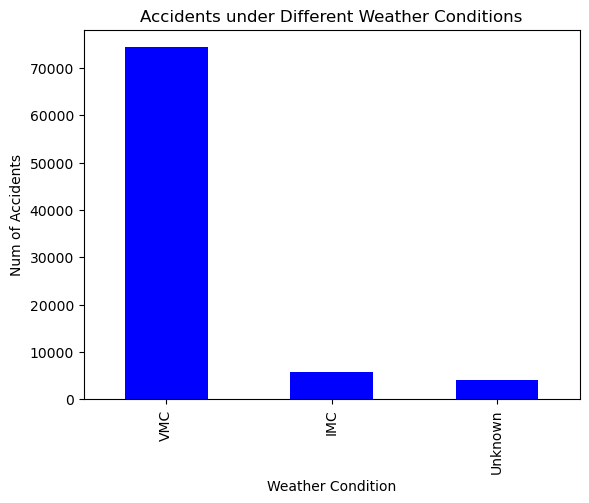

In [65]:
#checking if weather contributes to the accident rates
weather_counts = df['Weather.Condition'].value_counts()
weather_counts.plot.bar(color='blue')
plt.title("Accidents under Different Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Num of Accidents")

Over 80% of accidents occur in  ****VMC (Visual Meteorological Conditions), where pilots y can navigate using visual references rather than relying on instruments- **IMC (Instrument Meteorological Conditionss to weather conditihat require pilots to operate under **Instrument Flight Rules (IFR)**, meaning they must rely on their aircraft’s instruments for navigation due to poor visibility caused by fog, clouds, heavy rain, or other obstructions.

Text(0, 0.5, 'Num of Accidents')

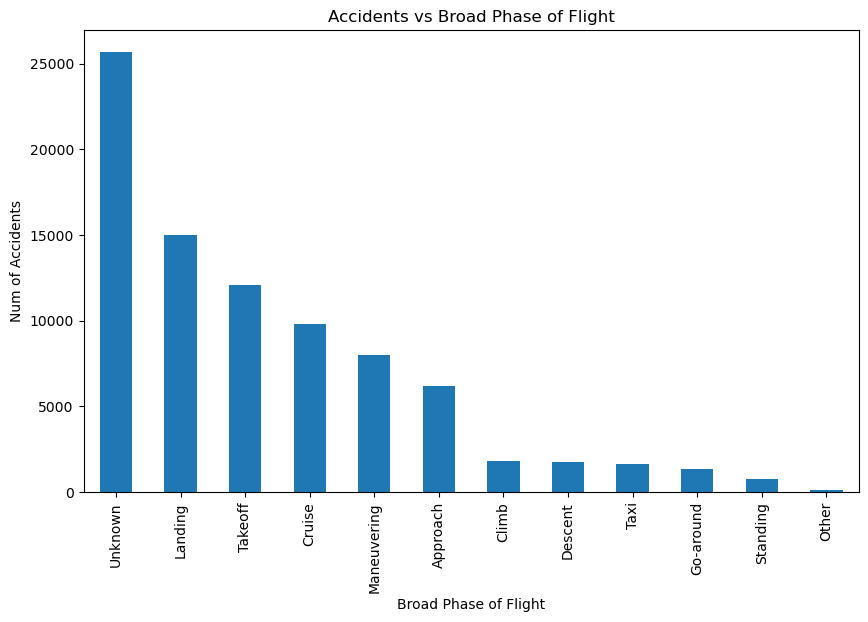

In [73]:
phase_counts = df['Broad.phase.of.flight'].value_counts()
plt.figure(figsize=(10,6))
phase_counts.plot.bar()
plt.title("Accidents vs Broad Phase of Flight")
plt.xlabel("Broad Phase of Flight")
plt.ylabel("Num of Accidents")

Althrough we dont know which broad phrase most accidents occur, accidents are more likely to occur during landing, takeoff, and cruising. 

In [66]:
# combine make and model and produce the top ten make and model

df['Make-Model'] = df['Make'] + ' ' + df['Model']
top_10_make_model_counts = df['Make-Model'].value_counts().head(10) 

Text(0, 0.5, 'Num of Accidents')

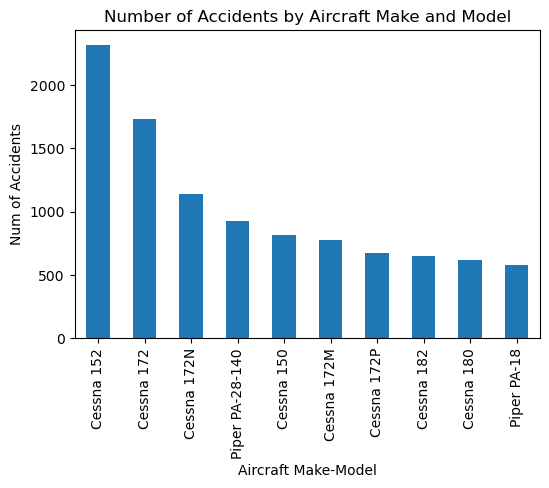

In [67]:
 # show a bar graph of make-model vs number of accidents.

plt.figure(figsize=(6,4))
top_10_make_model_counts .plot.bar()
plt.title("Number of Accidents by Aircraft Make and Model")
plt.xlabel("Aircraft Make-Model")
plt.ylabel("Num of Accidents")




Text(0, 0.5, 'Number of Accidents')

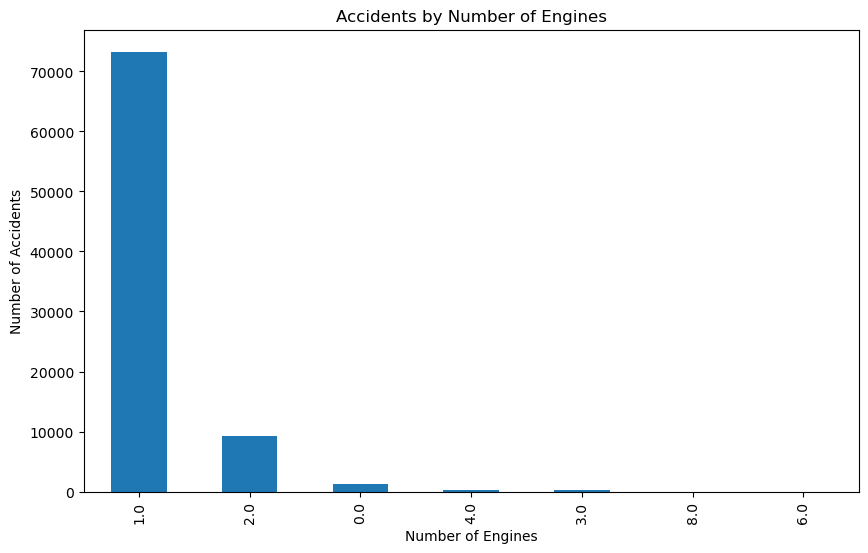

In [75]:
# bar graph of the number of engines vs accident counts
engine_counts = df['Number.of.Engines'].value_counts()
plt.figure(figsize=(10,6))
engine_counts.plot.bar()
plt.title("Accidents by Number of Engines")
plt.xlabel("Number of Engines")
plt.ylabel("Number of Accidents")

If an aircraft has one engine it is most likely to have an accident

### **2. Geographical Hotspots**  

We will **combine `Location` and `Country`**, then generate the **top 20 locations** to identify geographical hotspots.  

#### Findings:  
- The **United States** has the highest accident count, with over **79,000 accidents in 61 years**.  
- Brazil has the second highest accident count, but the U.S. has **over 200 times more accidents**.  
- In the U.S., the locations with the highest accident counts are:  
  - **Anchorage**  
  - **Albuquerque**  
  - **Houston**  


In [69]:
df['Country'].value_counts()

Country
United States                       79101
Brazil                                330
Canada                                308
Mexico                                289
United Kingdom                        219
                                    ...  
Saint Vincent and the Grenadines        1
BLOCK 651A                              1
Ivory Coast                             1
Malampa                                 1
Great Britain                           1
Name: count, Length: 206, dtype: int64

In [71]:
#combine location and country and sort them by accident count, accident count will be the index. Then slice the list to the top 20 locations
accident_counts = df.groupby(['Country', 'Location']).size().reset_index(name='Accident_Count')
accident_counts = accident_counts.sort_values(by='Accident_Count', ascending=False)
top_20 = accident_counts.head(20).copy()  

Text(0.5, 1.0, '20 Locations with the Highest Number of Aviation Accidents')

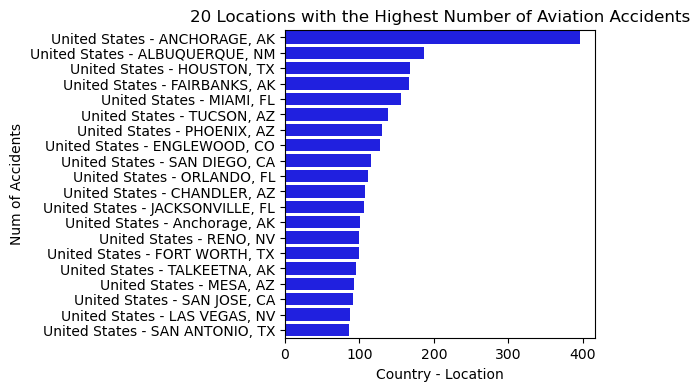

In [72]:

#plot the barchart
top_20.loc[:, 'Country_Location'] = top_20['Country'] + ' - ' + top_20['Location']

plt.figure(figsize=(4, 4))
sns.barplot(data=top_20, y='Country_Location', x ='Accident_Count', color='blue')
plt.xlabel("Country - Location")
plt.ylabel("Num of Accidents")
plt.title("20 Locations with the Highest Number of Aviation Accidents")

### **3. Patterns of Fatalities and Accidents Over Time**  

We will plot a **line graph** to investigate this objective on a single graph.  

#### Findings:  
- The **blue line** represents accident counts, which show a **declining trend over time**.  
- The **orange line** represents fatalities, which **fluctuated significantly from 1980 to 2000**, despite a decline in accidents. This indicates that some crashes during this period were highly severe.  
- After **2000, fatalities showed a decreasing trend**, suggesting improvements in **aviation safety and emergency response**.  


Text(0.5, 1.0, 'Aviation Accidents and Fatalities Over Time')

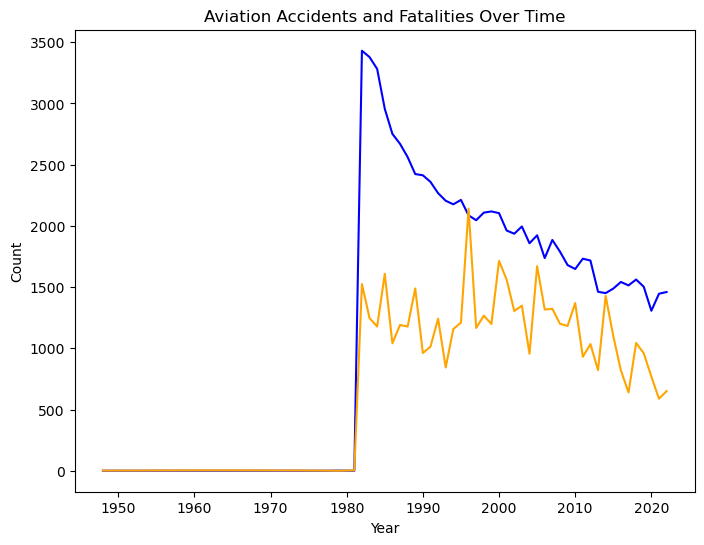

In [98]:
accident_trend = df.groupby('Event.Date').size().reset_index(name='Accident_Count')


fatality_trend = df.groupby('Event.Date')['Total.Fatal.Injuries'].sum().reset_index()

trend_data = accident_trend.merge(fatality_trend, on='Event.Date')

plt.figure(figsize=(8, 6))
plt.plot(trend_data['Event.Date'], trend_data['Accident_Count'], color = 'blue')
plt.plot(trend_data['Event.Date'], trend_data['Total.Fatal.Injuries'] , color ='orange')

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Aviation Accidents and Fatalities Over Time")

In [89]:
df['Country'].value_counts()

Country
United States                       79101
Brazil                                330
Canada                                308
Mexico                                289
United Kingdom                        219
                                    ...  
Saint Vincent and the Grenadines        1
BLOCK 651A                              1
Ivory Coast                             1
Malampa                                 1
Great Britain                           1
Name: count, Length: 206, dtype: int64

In [118]:
df.to_csv("NewName.csv", index=False)

### ** 3. Conclusion**  

#### **Factors Contributing to Accidents:**  
- **Aircraft make and model** are key mechanical factors contributing to accidents.  
- **Cessnas**, particularly **Cessna 152**, are more likely to be involved in accidents.  
- **Aircraft with one engine** have an **over 80% chance** of being in an accident.  
- While the specific phase when most accidents occur is **unclear**, a **significant number happen during landing**.  
- **Weather is not a major contributing factor**—most accidents occur when conditions are clear enough for pilots to navigate.  

#### **Geographical Findings:**  
- The **USA** has the highest accident count, especially in **Anchorage, Albuquerque, and Houston**.  
- This could be due to **high air traffic volume, diverse weather conditions, and major aviation hubs** in these areas.  
- **Stricter regulations and improved safety measures** could help reduce risks in high-incident regions.  

#### **Trends Over Time:**  
- **Accidents and fatalities have been decreasing over time**.  
- **Fatalities fluctuated significantly from 1980 to 2000**, despite a decline in accidents, indicating that some crashes were highly severe.  
- After **2000, fatalities showed a declining trend**, reflecting **advancements in aviation safety and emergency response**.  
- **Accidents peaked around 1980** but have shown a steady decline, suggesting **improvements in aviation safety and regulations**.  
- Despite occasional fluctuations, the **overall trend indicates a reduction in aviation incidents**.  
